In [2]:
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt
from itertools import combinations_with_replacement

In [3]:
d = pd.read_csv('sa2_sydney.csv')
dd = d[['SA2_NAME16', 'xcoord', 'ycoord']]
dd.set_index('SA2_NAME16', inplace=True)

In [5]:
G = nx.Graph()
pos = {}
for pl in dd.index:
    G.add_node(pl)
    pos[pl] = tuple(dd.loc[pl])

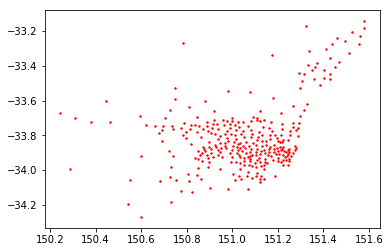

In [6]:
nx.draw_networkx(G, pos = pos, with_labels = False, node_size = 2)

In [36]:
df = pd.read_csv('UR_POW_ALL.csv')

places = d['SA2_NAME16']

df.set_index('SA2 (POW)', inplace = True)

In [40]:
places = places[places != 'Holsworthy Military Area']

In [42]:
sydney_df = df[places].loc[places]

In [43]:
interactions=  {(p1,p2):(sydney_df[p1].multiply(sydney_df[p2])).sum()/min(sydney_df[p1].sum(),sydney_df[p2].sum()) 
                for p1, p2 in combinations_with_replacement(places, 2)}

In [55]:
#interactions=  {(p1,p2):((sydney_df[p1].multiply(sydney_df[p2])).divide(sydney_df.sum(axis=0)).sum()) 
#                for p1, p2 in combinations_with_replacement(places, 2)}
series_edges = pd.Series(interactions).sort_values(ascending = False)

In [58]:
series_edges

Sydney - Haymarket - The Rocks     Mosman                                     2845.665656
                                   Cremorne - Cammeray                        2725.406064
                                   Bondi Beach - North Bondi                  2704.218578
                                   Double Bay - Bellevue Hill                 2681.657803
                                   Centennial Park                            2627.666667
                                   Coogee - Clovelly                          2564.612571
                                   Neutral Bay - Kirribilli                   2543.256267
Potts Point - Woolloomooloo        Sydney - Haymarket - The Rocks             2460.512481
Sydney - Haymarket - The Rocks     Bondi - Tamarama - Bronte                  2411.778132
Darlinghurst                       Sydney - Haymarket - The Rocks             2376.770013
Sydney - Haymarket - The Rocks     Paddington - Moore Park                    2359.205934
          

In [56]:
def create_edges(T, G):
    freeze_i = len(series_edges)-1
    for i, k in enumerate(series_edges.keys()):
        if series_edges[k] < T:
            freeze_i = i
            break 
    final_edges = list(series_edges.keys()[:freeze_i])
    G = nx.create_empty_copy(G)
    for e in final_edges:
        G.add_edge(e[0], e[1])
    return G

(150.1738380206042, 151.64858464451382, -34.33699268417654, -33.07652698871414)

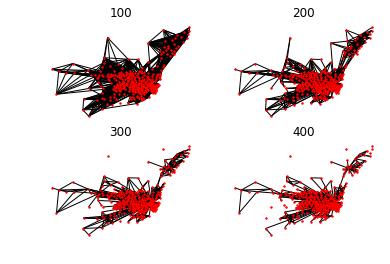

In [57]:
%matplotlib inline
plt.subplot(2,2,1)
G = create_edges(100, G)
nx.draw_networkx(G, pos = pos, with_labels = False, node_size = 2)
plt.title(100)
plt.axis('off')

plt.subplot(2,2,2)
G = create_edges(200, G)
nx.draw_networkx(G, pos = pos, with_labels = False, node_size = 2)
plt.title(200)
plt.axis('off')

plt.subplot(2,2,3)
G = create_edges(300, G)
nx.draw_networkx(G, pos = pos, with_labels = False, node_size = 2)
plt.title(300)
plt.axis('off')

plt.subplot(2,2,4)
G = create_edges(400, G)
nx.draw_networkx(G, pos = pos, with_labels = False, node_size = 2)
plt.title(400)
plt.axis('off')

In [77]:
G = create_edges(300, G)

In [86]:
len(G.nodes)

312

In [85]:
np.array(list(dict(G.degree).values())).mean()

5.6923076923076925

$$\frac{dI}{dt} = \lambda \cdot \bar{z} \frac{I}{N} \frac{S}{N}$$
On a more granular level,
$$\frac{dI_j}{dt} = \lambda \cdot  \sum_{i \in N(j)} \sum_{k \in G} p_k \cdot S_j^{k} I_i^{k}$$

with $p_k = \frac{\langle z \rangle}{nC2} = \frac{\langle z \rangle}{n(n-1)/2}$

$S_i^k$ is the number of suceptible workers living in $i$ working in $k$.

If we model the workplace with $n$ workers as a network, $\bar{z}$ is the average degree of a worker in the workplace.

In [69]:
GG = nx.Graph()
GG.add_node(0, old = 5000, working = 1, children = 200)
GG.add_node(1, old = 5001, working = 2, children = 200)

In [76]:
np.ones(5) + np.ones(5)

array([2., 2., 2., 2., 2.])

In [74]:
np.array(pd.DataFrame((dict(GG.nodes(data = True)))))

array([[ 200,  200],
       [5000, 5001],
       [   1,    2]], dtype=int64)

In [68]:
for node in GG.nodes('hi'):
    print(node)

(0, 'blue')
(1, 'red')


Model for night update:

a